# 210420 Fix Component 3

In [1]:
const COMPONENT = 3;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-5494095090334863774\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2814232720633048056\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-5494095090334863774\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,1676,87883,Burkholderia multivorans,species,329,1,NaN,1,16,9,0.91003,10,1,multivorans
2,1617,95486,Burkholderia cenocepacia,species,329,1,NaN,1,20,7,0.809156,2,1,cenocepacia
3,549,292,Burkholderia cepacia,species,329,1,NaN,1,64,1,0.693642,1,1,cepacia
4,1283,60552,Burkholderia vietnamiensis,species,329,1,NaN,1,36,2,0.611051,0,1,vietnamiensis
5,1293,1207504,Burkholderia pseudomultivorans,species,329,1,NaN,1,9,3,0.701356,0,1,pseudomultivorans
6,1411,1503055,Burkholderia territorii,species,329,1,NaN,1,31,4,0.642863,0,1,territorii
7,1584,152500,Burkholderia dolosa,species,329,1,NaN,1,3,5,0.0188395,0,1,dolosa
8,1588,488447,Burkholderia contaminans,species,329,1,NaN,1,3,6,0.636391,0,1,contaminans
9,1619,488732,Burkholderia diffusa,species,329,1,NaN,1,10,8,0.42305,0,1,diffusa


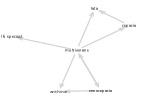

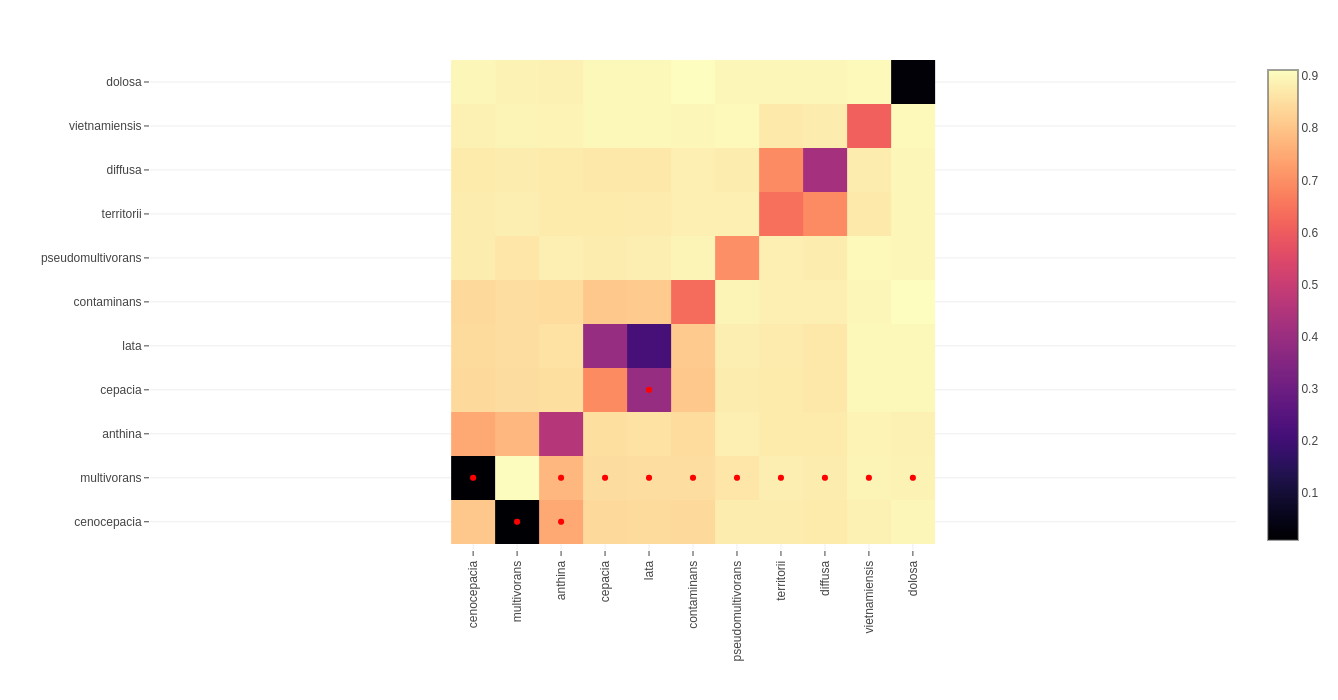

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

## Edits

### multivorans

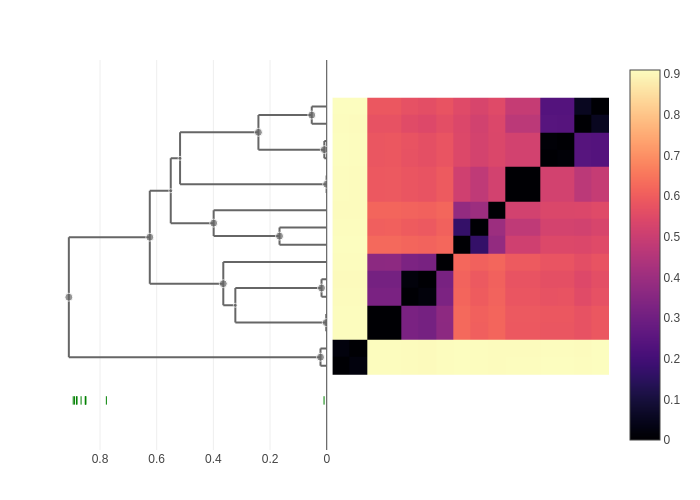

In [4]:
let taxon = "multivorans"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [5]:
remove_subtrees!(edits, trees["multivorans"], [21])

#9 multivorans:
	2/16 removed
	Diameter 0.9100 => 0.6244


### cenocepacia/anthina

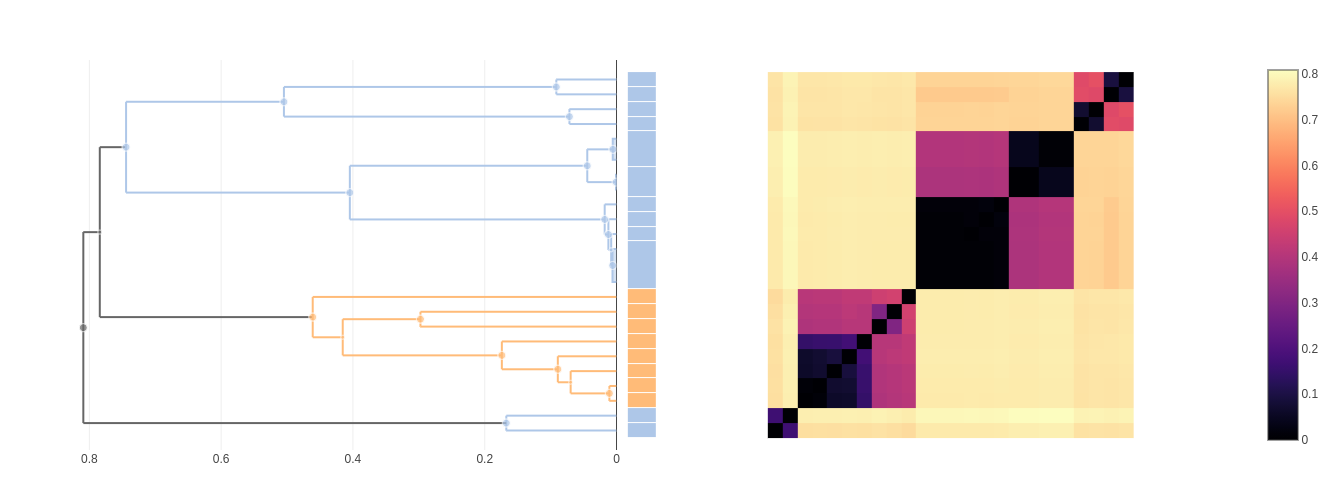

In [6]:
trees["cenocepacia-anthina"] = cluster_annotate(cdata, ["cenocepacia", "anthina"])
plot(multi_clustermap(cdata, trees["cenocepacia-anthina"]))

In [7]:
remove_subtrees!(edits, trees["cenocepacia-anthina"], 46)

#7 cenocepacia:
	2/20 removed
	Diameter 0.8092 => 0.7443


### cepacia/lata

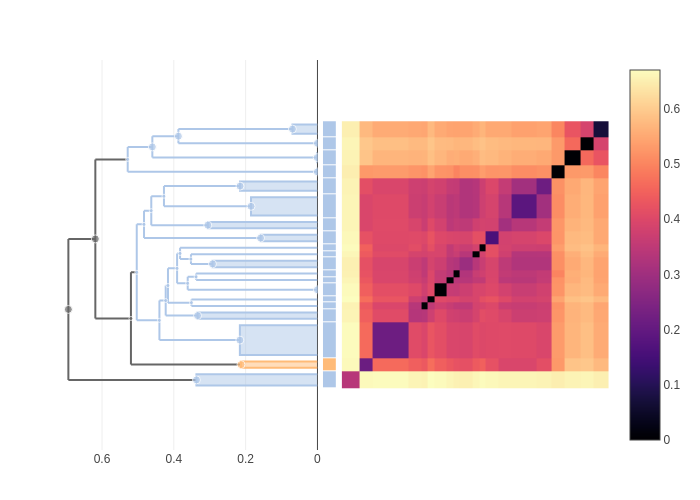

In [8]:
trees["cepacia-lata"] = cluster_annotate(cdata, ["cepacia", "lata"])
plot(multi_clustermap(cdata, trees["cepacia-lata"]))

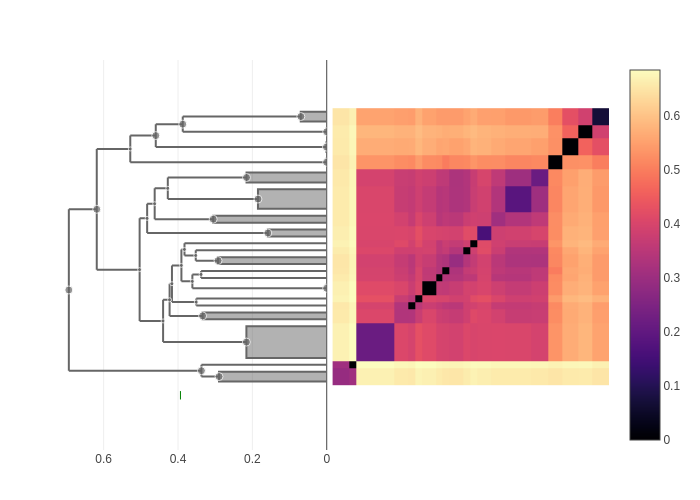

In [9]:
let taxon = "cepacia"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [10]:
keep_subtrees!(edits, trees["cepacia"], 124)

#1 cepacia:
	14/64 removed
	Diameter 0.6936 => 0.5032


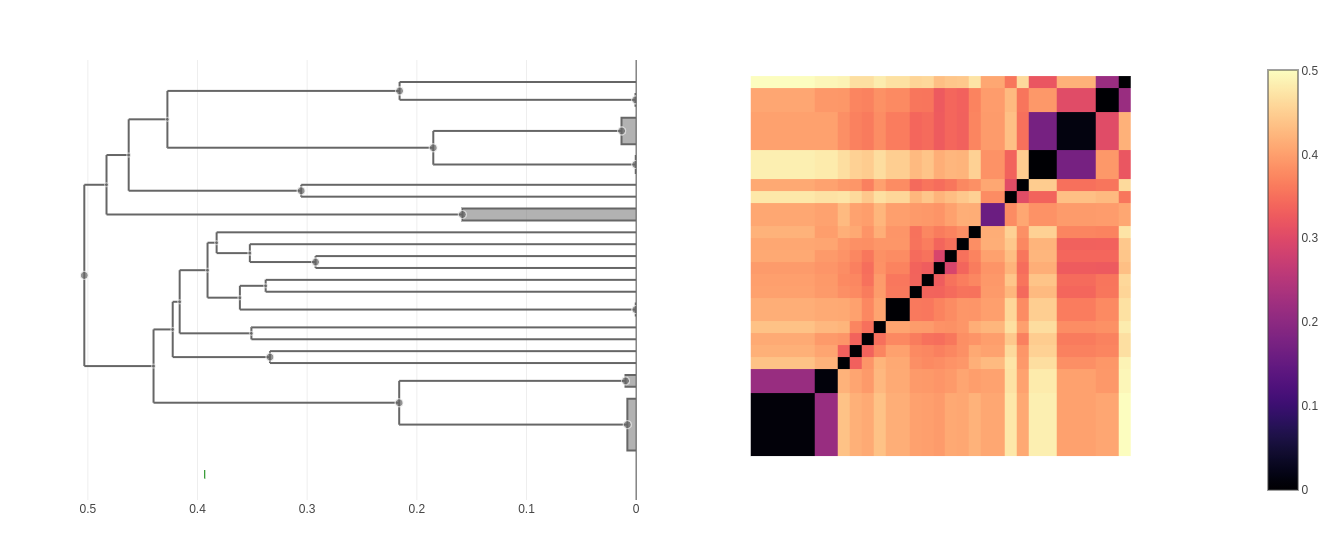

In [11]:
let edited = apply_edits(edits)
    plot(clustermap(edited, "cepacia"))
end

In [12]:
set_threshold!(edits, "cepacia", .35)

0.35

## Finish

In [13]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Float64?,String
1,1,cepacia,64,0.693642,0,14,,0.35,0.5032
2,7,cenocepacia,20,0.809156,0,2,,missing,0.7443
3,9,multivorans,16,0.91003,0,2,,missing,0.6244
